# Documentation

Here is a dataset on campus placements. There is a total of 215 student records with information about each student of their SSC board and scores, HSC board, specialisation and scores, degree, MBA etc. <br>
Our objective is to predict if, given the select information about a student, should that student be Placed or Unplaced. Also, what is the salary that is to be offered to that student.<br>

To achieve our objective, we have used Classification to predict if the student should be Placed or Unplaced, and, Regression algorithms to predict the said salary of the student.<br>
Also, In this code, we have an in-depth Exploratory data analysis with inferences based on the analysis.
<br>
<br>Here is an overview of the dataset,
1. sl_no - unique identifier of each student record
2. gender - Male='M',Female='F'
3. ssc_p - Secondary Education percentage
4. ssc_b - Secondary Education Board(Central or Others)
5. hsc_p - Higher Secondary Education percentage
6. hsc_b - Higher Secondary Education Board(Central or Others)
7. hsc_s - Specialization in Higher Secondary Education (Commerce or Science or Others)
8. degree_p - Degree Percentage
9. degree_t - Degree Type or specialisation (Comm&Mgmt, Sci&Tech, Other)
10. workex - Has prior work experience or not (yes/no)
11. etest_p - Employability test percentage (conducted prior to Placements)
12. specialisation - MBA Specialization (Mkt&Fin or Mkt&HR)
13. mba_p - MBA percentage
14. status - Status of placement (Placed or Not placed)
15. salary - Salary offered by corporate to placed students

Following are the steps followed in this code:

1. Import Libraries
2. Loading and Understanding Data
3. EDA - Univariate, Bivariate, Multivariate analysis, missing values check, Outlier detection
4. Feature Engineering - Imputing, Handling Outliers, Encoding
5. Modelling - Train-test Split, Handling Imbalanced data, Feature scaling, Modelling & Hyperparameter tuning


# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

C:\Users\kalva\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\kalva\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\kalva\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
matplotlib.rcParams['figure.figsize'] = (10,6)

# Loading & Understanding Data

In [3]:
df = pd.read_csv(r"D:\PT1 AND PT2\ALL-PROJECTS\project 2\DATASET\Placement_Data_Full_Class.csv")

In [4]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [5]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [7]:
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

## Insights from Data:

1. There are a total of 215 student records. It contains information about student's SSC %, SSC board, HSC %, HSC board, HSC Specialization, Degree %, Degree Specialization, Work Exp status (yes/no), Etest %, MBA Specialization, MBA %, Salar, and Placed Status (Yes/No)
2. Target feature - status (Placement status, to predict if student will be placed or not) and salary (for students who are to be placed, we will predict what salary should they be placed with)
3. Total features count = 14 (excluding target feature)
4. Count of numerical features = 7
5. Count of categorical features = 8 (including target feature)
6. Missing values - Only Salary feature has missing values (Unplaced students)

# Exploratory Data Analysis (EDA)

## Univariate Analysis

### Understanding Categorical features
1. What is the gender distribution of students?
2. What are the different HSC boards, and what is the distribution of students in each of the HSC board types?
3. What are the different HSC specializations, and what is the distribution of students in each of the HSC specialisations?
4. What are the different Degree specialisations, and what is the distribution of students in each of the degree specialisations?
5. How many students have work experience?
6. What are the different specialisations in MBA, and what is the distribution of students in each of the MBA specialisation?
7. How many of the students are currently placed, and how many are unplaced?

<AxesSubplot: xlabel='gender', ylabel='count'>

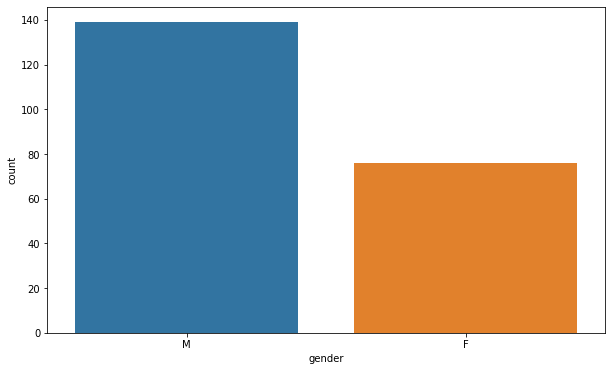

In [8]:
sns.countplot(data=df,x='gender')

In [9]:
df['gender'].value_counts()

M    139
F     76
Name: gender, dtype: int64

1.There are nearly twice as much as male students(139) as female students(76) in the college. 

<AxesSubplot: xlabel='hsc_b', ylabel='count'>

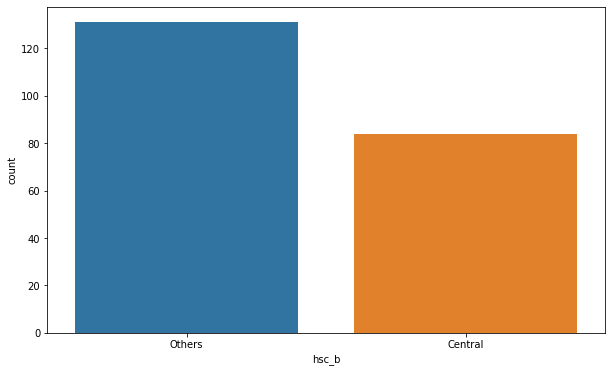

In [10]:
sns.countplot(data=df,x='hsc_b')

In [11]:
df['hsc_b'].value_counts()

Others     131
Central     84
Name: hsc_b, dtype: int64

2.Students are from Central or Others HSC board. More than 50% (84) of 215 students are from the Central HSC board.

<AxesSubplot: xlabel='hsc_s', ylabel='count'>

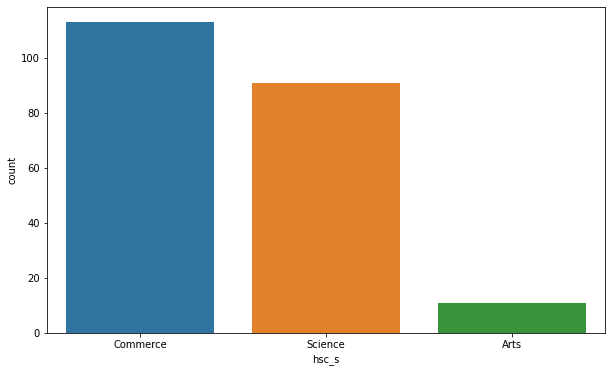

In [12]:
sns.countplot(data=df,x='hsc_s')

In [13]:
df['hsc_s'].value_counts()

Commerce    113
Science      91
Arts         11
Name: hsc_s, dtype: int64

3.There are 3 HSC specialisations, Commerce, Science and Arts. Commerce has the maximum students enrolled (113), followed by Science (91) and Arts (11)

<AxesSubplot: xlabel='degree_t', ylabel='count'>

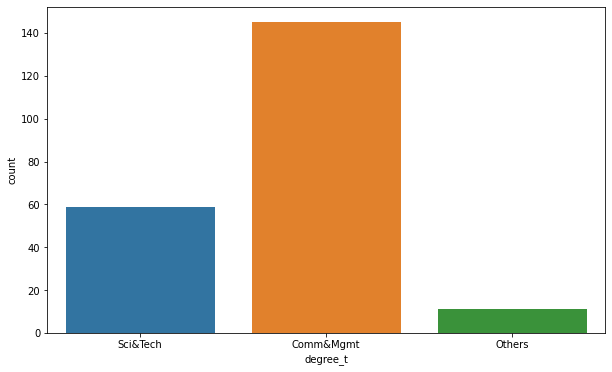

In [14]:
sns.countplot(data=df,x='degree_t')

In [15]:
df['degree_t'].value_counts()

Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: degree_t, dtype: int64

4.There are 2 main degree specialisations Comm&Mgmt and Sci&Tech which most students have opted for, rest are categorized as others. Maximum students are enrolled in Comm&Mgmt (145) followed by Sci&tech(59) with rest in others (11)

<AxesSubplot: xlabel='workex', ylabel='count'>

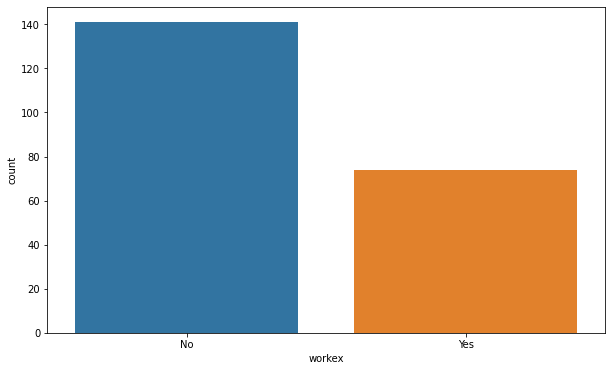

In [16]:
sns.countplot(data=df,x='workex')

In [17]:
df['workex'].value_counts()

No     141
Yes     74
Name: workex, dtype: int64

5.Only 74 students have prior work experience, remaining 141 students are freshers.

<AxesSubplot: xlabel='specialisation', ylabel='count'>

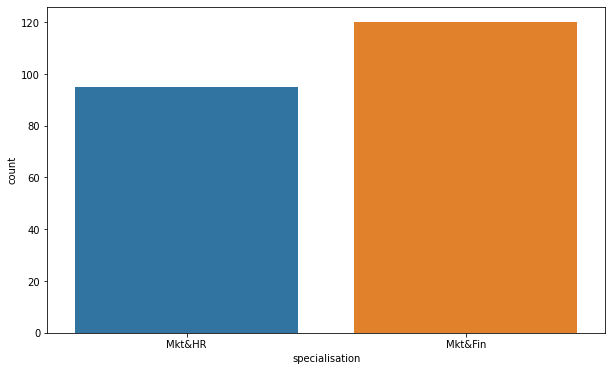

In [18]:
sns.countplot(data=df,x='specialisation')

In [19]:
df['specialisation'].value_counts()

Mkt&Fin    120
Mkt&HR      95
Name: specialisation, dtype: int64

6.There are 2 MBA specialisations that students can opt for. Maximum number of students have opted for Mkt&Fin(120), and remaining hav opted for Mkt&HR(95)

<AxesSubplot: xlabel='status', ylabel='count'>

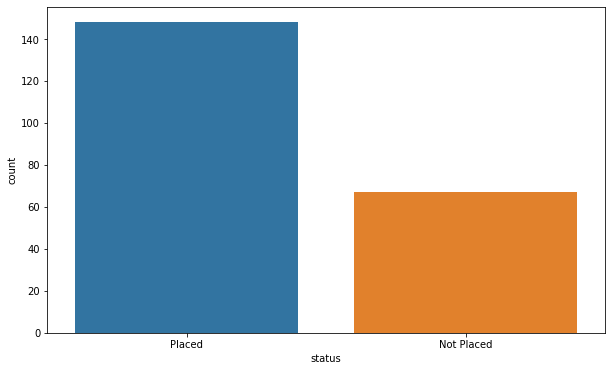

In [20]:
sns.countplot(data=df,x='status')

In [21]:
df['status'].value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

In [22]:
len(df[df['status']=='Placed'])/len(df)*100

68.83720930232559

7.As computed, 68.83% of the students are already placed, remaining are unplaced.

### Understanding Numerical Features
1. What are the total number of student records? Are there any duplicates?
2. What is the minimum, 25th percentile, mean, 75th percentile, and maximum SSC percentage of students?
3. What is the minimum, 25th percentile, mean, 75th percentile, and maximum HSC percentage of students?
4. What is the minimum, 25th percentile, mean, 75th percentile, and maximum SSC percentage of students?
5. What is the minimum, 25th percentile, mean, 75th percentile, and maximum Degree percentage of students?
6. What is the minimum, 25th percentile, mean, 75th percentile, and maximum etest percentage of students?
7. What is the minimum, 25th percentile, mean, 75th percentile, and maximum MBA percentage of students?
8. What is the minimum, 25th percentile, mean, 75th percentile, and maximum salaries offered to placed students?

In [23]:
df['sl_no'].nunique()

215

1.There a 215 student records, and no duplicates.

In [24]:
df.drop(['sl_no','salary'],axis=1).describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p
count,215.000000,215.000000,215.000000,215.000000,215.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186
std,10.827205,10.897509,7.358743,13.275956,5.833385
min,40.890000,37.000000,50.000000,50.000000,51.210000
25%,60.600000,60.900000,61.000000,60.000000,57.945000
50%,67.000000,65.000000,66.000000,71.000000,62.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000
max,89.400000,97.700000,91.000000,98.000000,77.890000


Refer the above table to answer questions 2-7.

In [25]:
df[df['status']=='Placed']['salary'].describe()

count       148.000000
mean     288655.405405
std       93457.452420
min      200000.000000
25%      240000.000000
50%      265000.000000
75%      300000.000000
max      940000.000000
Name: salary, dtype: float64

8.Of the placed students, the lowest salary offered is Rs.200000 and the highest salary offered is Rs.940000. The average salary of the batch is Rs.288655.4. 75th percentile of the batch earns Rs.300000, and 25th percentile of the batch earns Rs.240000

## Bivariate Analysis

1. What is the gender-wise distribution of students in different SSC boards?
2. What is the gender-wise distribution of students in different HSC boards?
3. What is the gender-wise distribution of students in different Degree specialisations?
4. What is the gender-wise distribution of students in different MBA specialisations?
5. What is the gender-wise distribution of students with work experience?
6. What is the gender-wise distribution of students who got placed?
7. What is the 5-point summary SSC % of students gender-wise?
8. What is the 5-point summary HSC % of students gender-wise?
9. What is the 5-point summary Degree % of students gender-wise?
10. What is the 5-point summary etest % of students gender-wise?
11. What is the 5-point summary MBA % of students gender-wise?
12. What is the 5-point summary of salary distribution of placed students gender-wise?
13. Does the ssc board in which the student studied have an impact on placement?
14. Does the hsc board in which the student studied have an impact on placement?
15. Does the hsc specialisation opted by the student  have an impact on placement?
16. Does the degree specialisation opted by the student  have an impact on placement?
17. Does the MBA specialisation opted by the student  have an impact on placement?
19. Does having prior workex by the student  have an impact on placement?
20. Does the SSC % of a student affect their placements?
21. Does the HSC % of a student affect their placements?
22. Does the Degree % of a student affect their placements?
23. Does the etest % of a student affect their placements?
24. Does the MBA % of a student affect their placements?
25. Does the SSC % affect the HSC board opted by the student?
26. Does the SSC % affect the HSC specialisation opted by the student?
27. Does the HSC % affect the Degree specialisation opted by the student?
28. Does the Degree % affect the MBA specialisation opted by the student?
29. Is there a correlation between the SSC % and the salary offered to placed students?
30. Is there a correlation between the HSC % and the salary offered to placed students?
31. Is there a correlation between the Degree % and the salary offered to placed students?
32. Is there a correlation between the etest % and the salary offered to placed students?
33. Is there a correlation between the MBA % and the salary offered to placed students?
34. What are different correlations that exist between the scores earned by students from SSC to MBA? 
35. Does the salary offered to placed students factor in the SSC board the students studied in?
36. Does the salary offered to placed students factor in the HSC board the students studied in?
37. Does the salary offered to placed students factor in the HSC specialisation the students opted?
38. Does the salary offered to placed students factor in the Degree specialisation the students opted?
39. Does the salary offered to placed students factor in prior work experience?
40. Does the salary offered to placed students factor in the MBA specialisation the students opted?
41. Does the salary offered to placed students factor in the SSC % scored by students?
42. Does the salary offered to placed students factor in the HSC % scored by students?
43. Does the salary offered to placed students factor in the Degree % scored by students?
44. Does the salary offered to placed students factor in the etest % scored by students?
45. Does the salary offered to placed students factor in the MBA % scored by students?

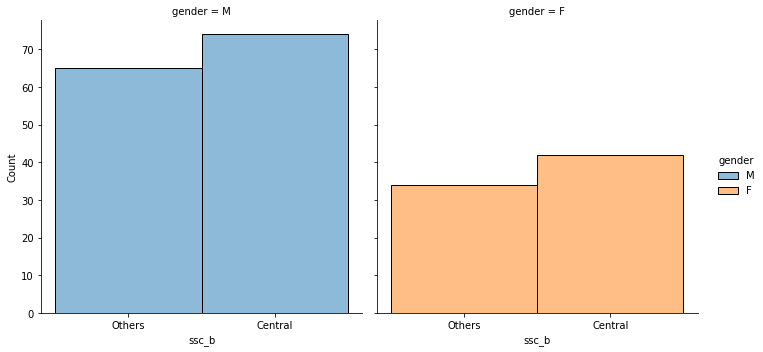

In [26]:
sns.displot(data=df,x='ssc_b',col='gender',hue='gender')

1.Maximum students are male from Central SSC, followed by Male in others.

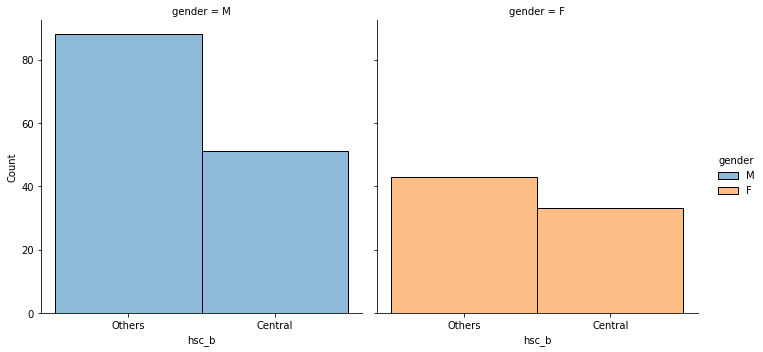

In [27]:
sns.displot(data=df,x='hsc_b',col='gender',hue='gender')

2.In HSC, maximum students are male in HSC Others board followed by Central.

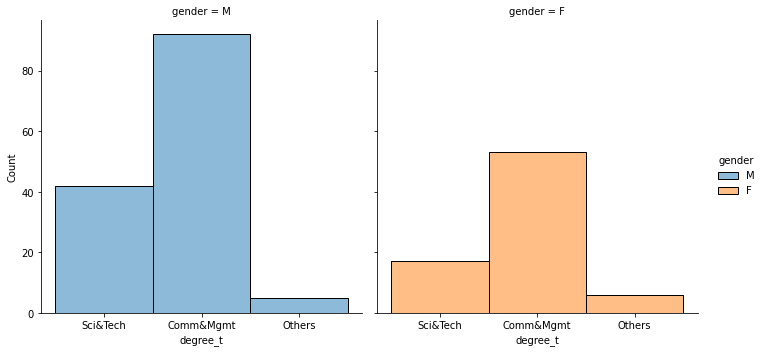

In [28]:
sns.displot(data=df,x='degree_t',col='gender',hue='gender')

3.Maximum students are in Comm&Mgmt both male and female, followed by Sci&Tech

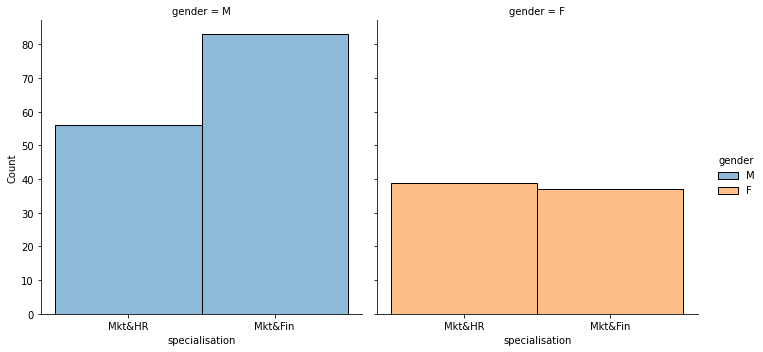

In [29]:
sns.displot(data=df,x='specialisation',col='gender',hue='gender')

4.Male students are mostly focused in Mtk&Fin whereas female students has an almost equal distribution in Mkt&HR and Mkt&Fin

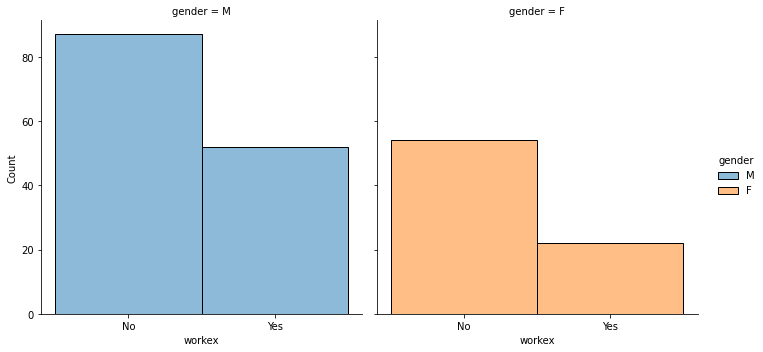

In [30]:
sns.displot(data=df,x='workex',col='gender',hue='gender')

5.Majority of both male and female students donot have any prior work experience

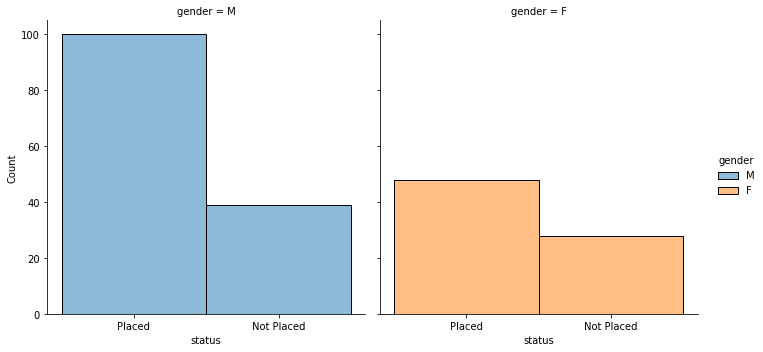

In [31]:
sns.displot(data=df,x='status',col='gender',hue='gender')

6.The ratio of placed:unplaced students is greater for male students against female students.

In [32]:
df.groupby(['gender'])['ssc_p'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
F,76.0,68.310921,11.522542,40.89,62.5,69.75,77.0,88.0
M,139.0,66.752518,10.429150,41.00,60.2,65.00,74.0,89.4


7. Female students have overall scored better than male students in ssc, however the highest is scored by a male student.

In [33]:
df.groupby(['gender'])['hsc_p'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
F,76.0,66.646842,11.021048,37.0,60.0,64.6,73.0,97.0
M,139.0,66.161655,10.865579,39.0,61.0,65.0,73.0,97.7


8.In HSC, male students have scored better than female students by a negligable margin.

In [34]:
df.groupby(['gender'])['degree_p'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
F,76.0,68.090000,8.128285,50.2,64.00,67.7,73.0,91.0
M,139.0,65.429856,6.748840,50.0,60.45,65.0,70.1,83.0


9.Female students have overall scored better than male students in Degree.

In [35]:
df.groupby(['gender'])['etest_p'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
F,76.0,70.590658,13.343943,50.0,58.765,69.0,80.000,98.0
M,139.0,72.926115,13.213727,50.0,61.140,72.0,84.135,97.4


10.Male students have overall scored better than female students in employablity test.

In [36]:
df.groupby(['gender'])['mba_p'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
F,76.0,64.643553,5.242545,53.29,60.710,64.805,68.675,76.18
M,139.0,60.984892,5.750263,51.21,56.875,60.440,64.245,77.89


11.Female students have overall scored better than male students in MBA.

In [37]:
df.groupby(['gender'])['salary'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
F,48.0,267291.666667,75948.178955,200000.0,219500.0,250000.0,300000.0,650000.0
M,100.0,298910.000000,99514.792058,200000.0,250000.0,270000.0,300000.0,940000.0


12.Male students who got placed have a higher average salary compared to female students. The highest salary is offered to a male student. 

<AxesSubplot: xlabel='ssc_b', ylabel='Count'>

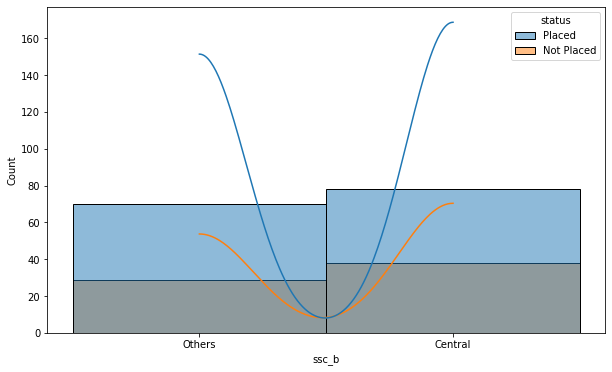

In [38]:
sns.histplot(data=df,x='ssc_b',hue='status',kde=True)

13.SSC board does not have an impact on placement.

<AxesSubplot: xlabel='hsc_b', ylabel='Count'>

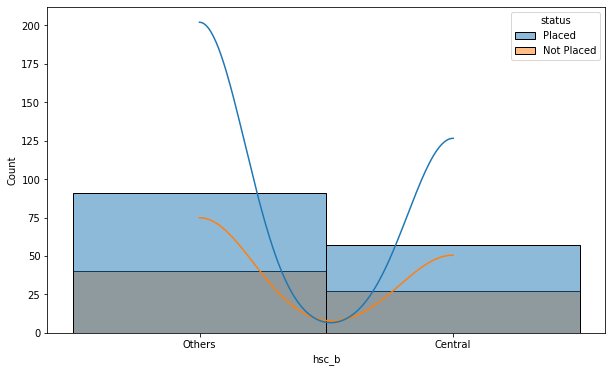

In [39]:
sns.histplot(data=df,x='hsc_b',hue='status',kde=True)

14.HSC board does not have an impact on placement.

<AxesSubplot: xlabel='hsc_s', ylabel='Count'>

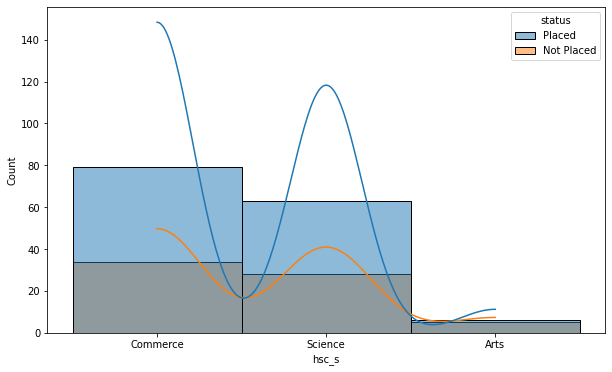

In [40]:
sns.histplot(data=df,x='hsc_s',hue='status',kde=True)

<AxesSubplot: xlabel='hsc_s', ylabel='Count'>

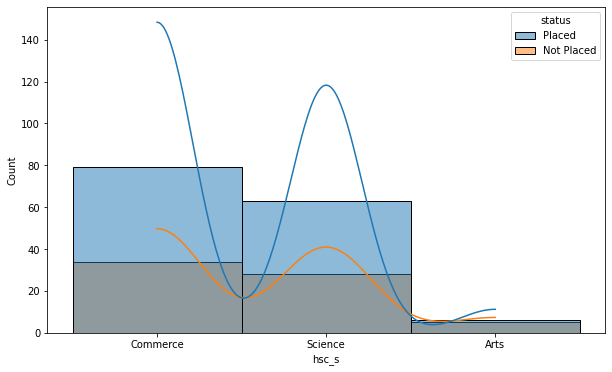

In [41]:
sns.histplot(data=df,x='hsc_s',hue='status',kde=True)

15.HSC specialisation does not have an impact on placement.

<AxesSubplot: xlabel='degree_t', ylabel='Count'>

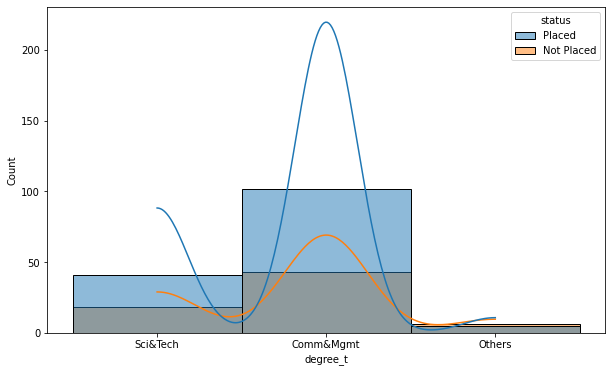

In [42]:
sns.histplot(data=df,x='degree_t',hue='status',kde=True)

16.In Degree specialisation, we observe that the curve flattens near Others. From this it can be inferred that placements aren't rosy for Others specialisations.

<AxesSubplot: xlabel='specialisation', ylabel='Count'>

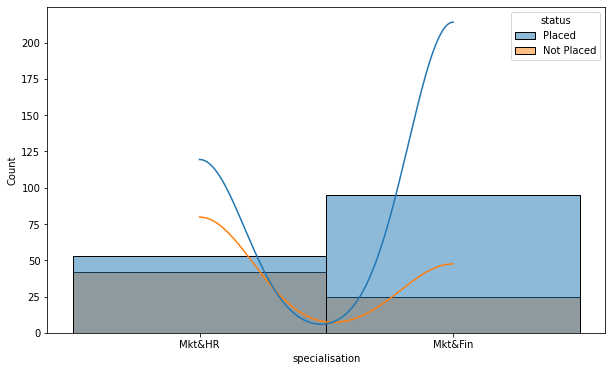

In [43]:
sns.histplot(data=df,x='specialisation',hue='status',kde=True)

17.Students with Mkt&Fin have a higher probability for placements compared to Mkt&HR

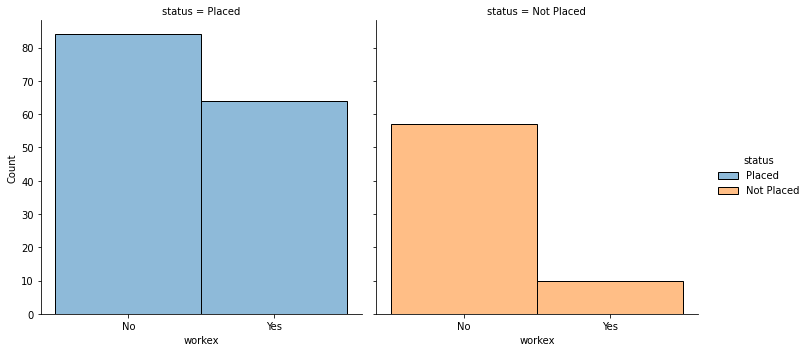

In [44]:
sns.displot(data=df,x='workex',col='status',hue='status')

18.Prior work experience has no effect on placements.

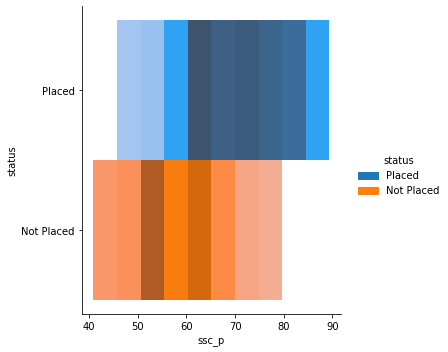

In [45]:
sns.displot(data=df,x='ssc_p',y='status',hue='status')

<AxesSubplot: xlabel='sl_no', ylabel='ssc_p'>

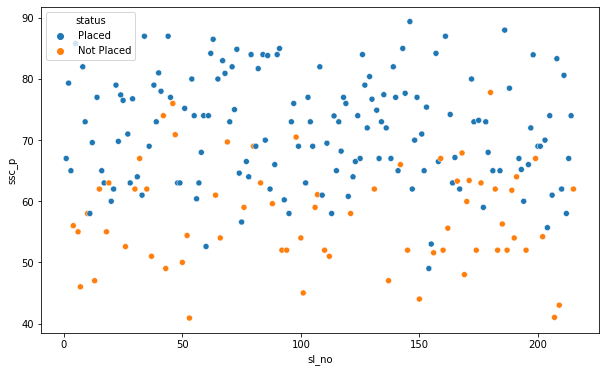

In [46]:
sns.scatterplot(data=df,x='sl_no',y='ssc_p',hue='status')

19.Students with scores above 60% is ssc have higher placement rate.

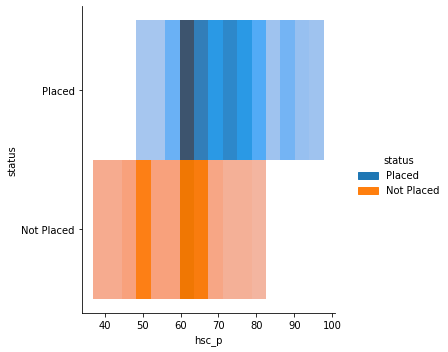

In [47]:
sns.displot(data=df,x='hsc_p',y='status',hue='status')

<AxesSubplot: xlabel='sl_no', ylabel='hsc_p'>

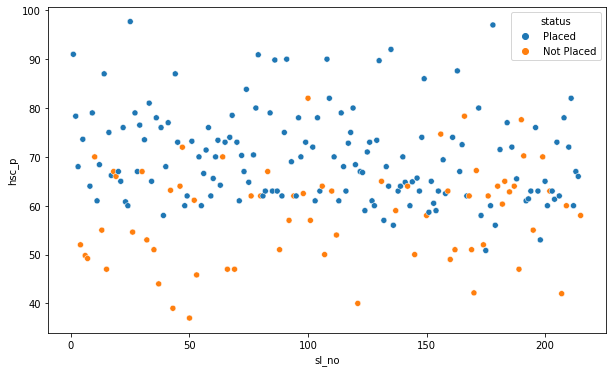

In [48]:
sns.scatterplot(data=df,x='sl_no',y='hsc_p',hue='status')

20.Similar to ssc, Students with scores above 60% is hsc have higher placement rate.

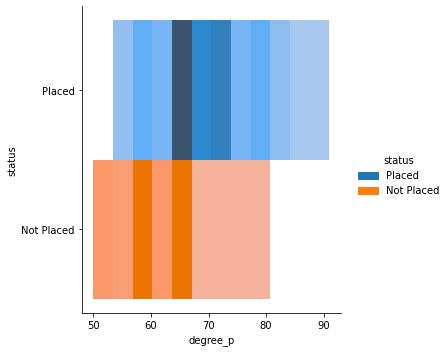

In [49]:
sns.displot(data=df,x='degree_p',y='status',hue='status')

<AxesSubplot: xlabel='sl_no', ylabel='degree_p'>

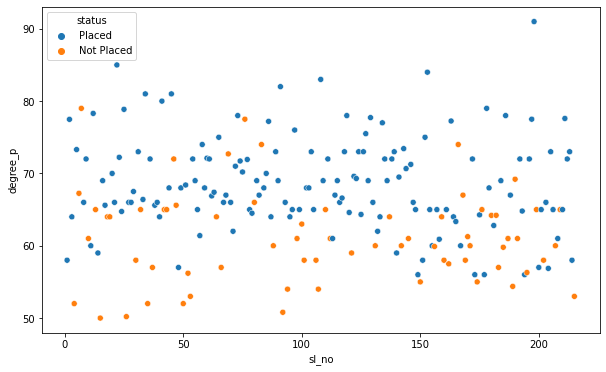

In [50]:
sns.scatterplot(data=df,x='sl_no',y='degree_p',hue='status')

21.Students with scores approx. above 65% is degrere have higher placement rate.

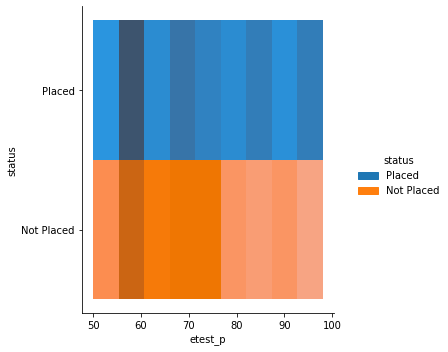

In [51]:
sns.displot(data=df,x='etest_p',y='status',hue='status')

<AxesSubplot: xlabel='sl_no', ylabel='etest_p'>

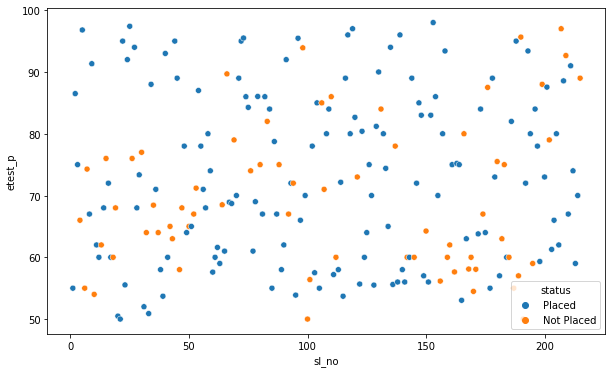

In [52]:
sns.scatterplot(data=df,x='sl_no',y='etest_p',hue='status')

22.No observable pattern between etest scores and placements.

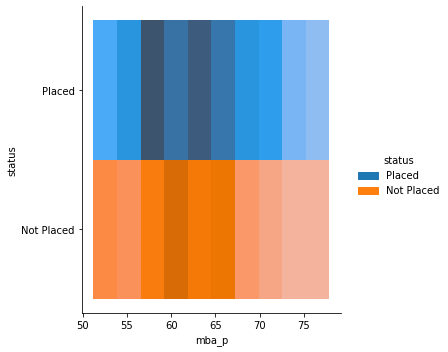

In [53]:
sns.displot(data=df,x='mba_p',y='status',hue='status')

<AxesSubplot: xlabel='sl_no', ylabel='mba_p'>

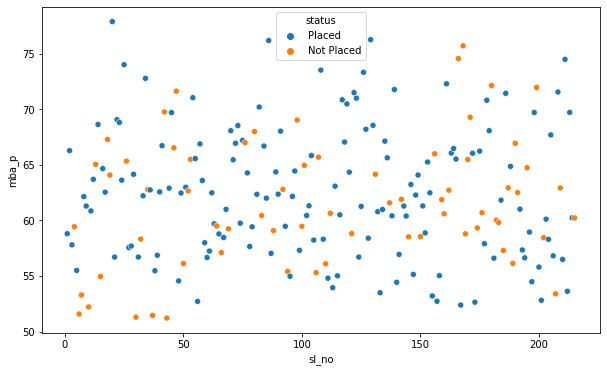

In [54]:
sns.scatterplot(data=df,x='sl_no',y='mba_p',hue='status')

23.Again, No observable pattern between mba scores and placements.

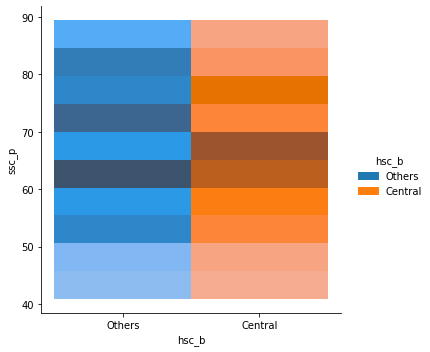

In [55]:
sns.displot(data=df,x='hsc_b',y='ssc_p',hue='hsc_b')

24.The SSC % does not affect the HSC board students opt for, a high density of students above 60% are found in  both Central and Others boards.

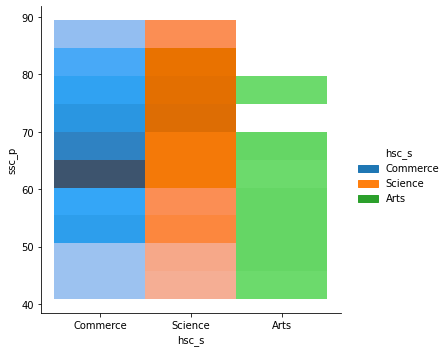

In [56]:
sns.displot(data=df,x='hsc_s',y='ssc_p',hue='hsc_s')

25.SSC % affects the HSC specialisation that student opts in HSC. Students with greater than 60% choose either Commerce or Science. Students with SSC higher than 70% to 85% mostly opt science.

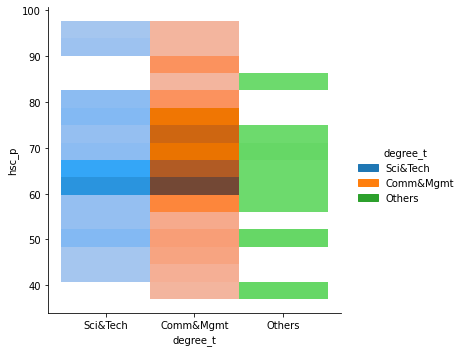

In [57]:
sns.displot(data=df,x='degree_t',y='hsc_p',hue='degree_t')

26.Students with scores around 60% have a stronger affinity to Sci&Tech and Comm&Mgmt. Students with scores greater than 90% have opted either Sci&Tech or Comm&Mgmt. 

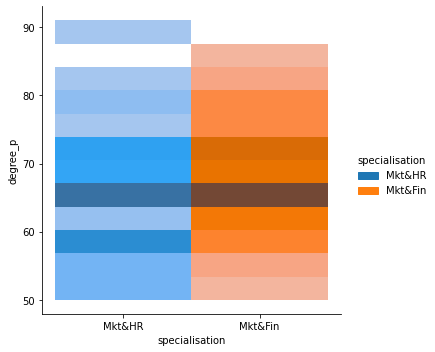

In [58]:
sns.displot(data=df,x='specialisation',y='degree_p',hue='specialisation')

27.Degree % does not affect the MBA specialisation

<AxesSubplot: >

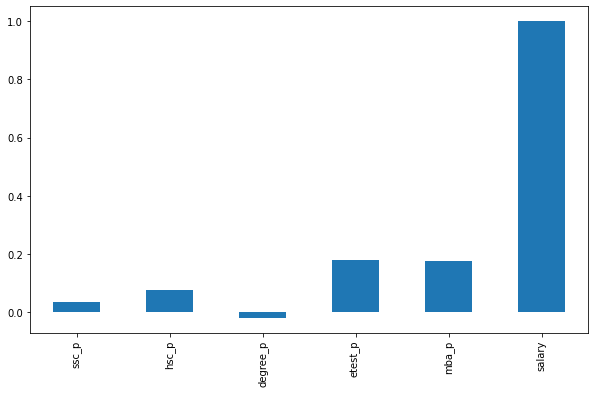

In [59]:
df.drop(['sl_no'],axis=1).corr()['salary'].plot(kind='bar')

28-32.Answering questions 28-32,
There is strong positive correlation between the salary offered to the placed students and their employability score and MBA %. This indicates, students who score higher in MBA% and etest% have a greater possibility to get a placement with higher salary.

In [60]:
df.drop(['sl_no','salary'],axis=1).corr()

,ssc_p,hsc_p,degree_p,etest_p,mba_p
ssc_p,1.000000,0.511472,0.538404,0.261993,0.388478
hsc_p,0.511472,1.000000,0.434206,0.245113,0.354823
degree_p,0.538404,0.434206,1.000000,0.224470,0.402364
etest_p,0.261993,0.245113,0.224470,1.000000,0.218055
mba_p,0.388478,0.354823,0.402364,0.218055,1.000000


<AxesSubplot: >

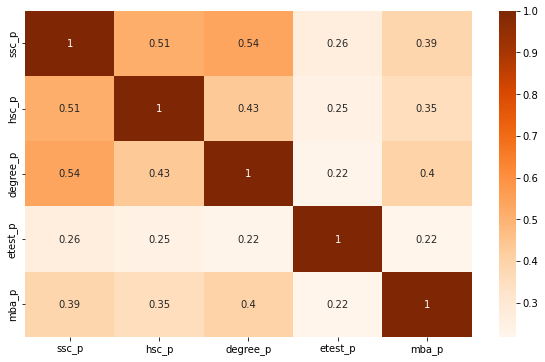

In [61]:
sns.heatmap(df.drop(['sl_no','salary'],axis=1).corr(),cmap='Oranges',annot=True)

33.(Considered correlations greater than 0.5 only for explanation)There is a strong +ve correlation between SSC % and HSC %, students who perform well in SSC are likely to perform well in HSC.
Similarly, there is a strong +ve correlation between SSC% and Degree %, students who perform well in SSC are likely to perform well in Degree.


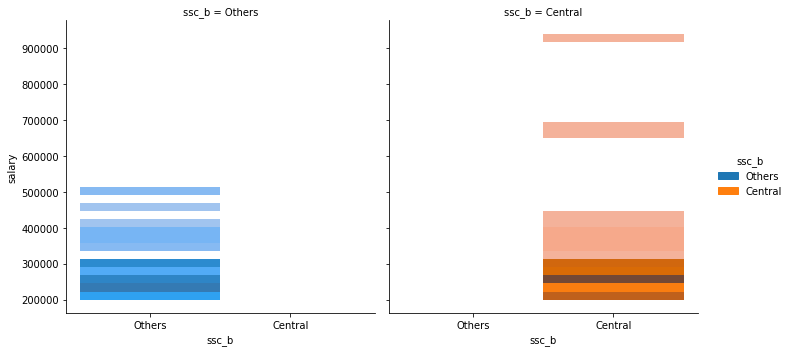

In [62]:
sns.displot(data=df,x='ssc_b',y='salary',col='ssc_b',hue='ssc_b')

34.The higher range of salaries (>650000) is offered to only those students from Central Board (SSC)

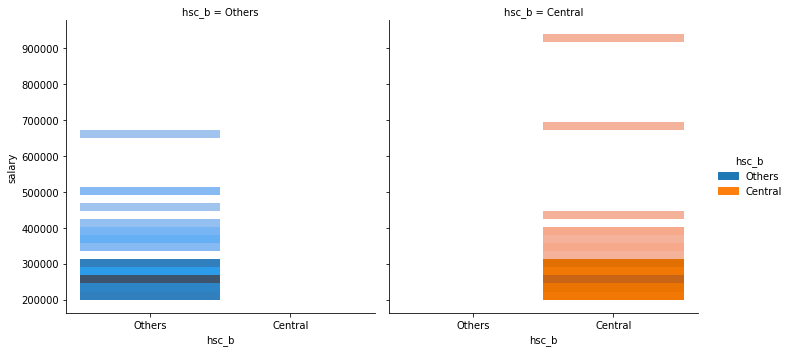

In [63]:
sns.displot(data=df,x='hsc_b',y='salary',col='hsc_b',hue='hsc_b')

35.Again, the highest salaries are offered to students from Central HSC board. 

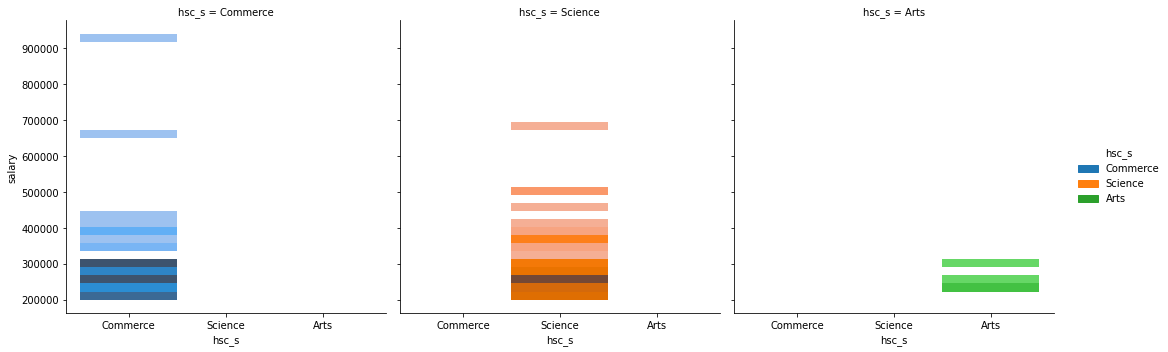

In [64]:
sns.displot(data=df,x='hsc_s',y='salary',col='hsc_s',hue='hsc_s')

36.Arts students are offered the lowest salaries amongst the specialisations. Commerce Students are made the highest offers, most offers however is in the same range of 2-3.5 lac for all 3 specialisations.

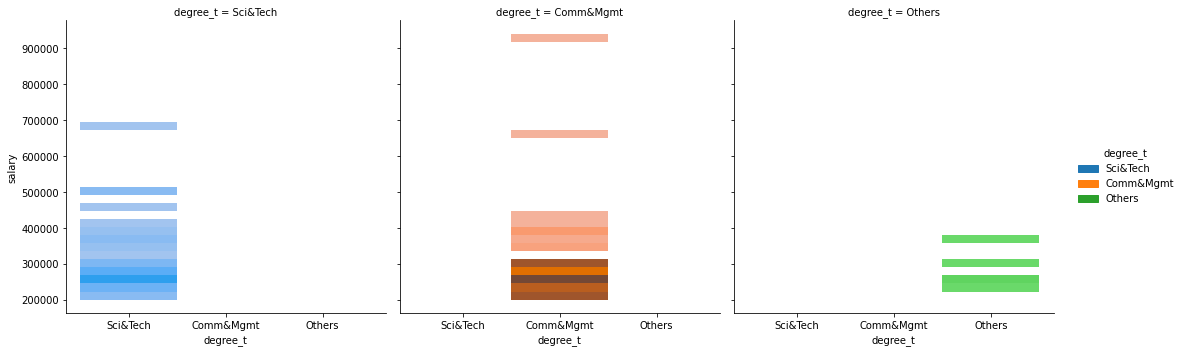

In [65]:
sns.displot(data=df,x='degree_t',y='salary',col='degree_t',hue='degree_t')

37.Students from Comm&Mgmt degree specialisation are made the highest salary offer. 

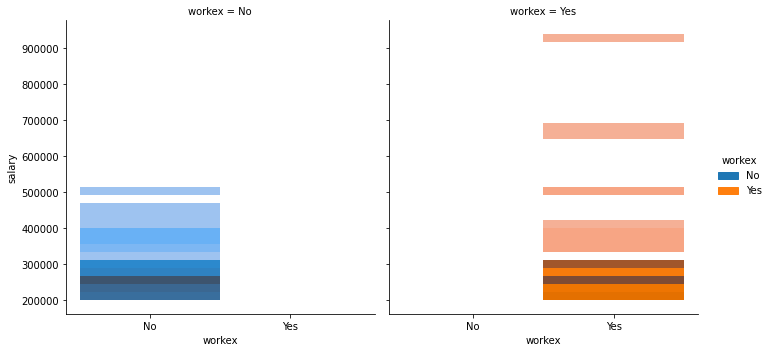

In [66]:
sns.displot(data=df,x='workex',y='salary',col='workex',hue='workex')

38.Yes, work experience does have an impact on the salary offered. Students with work experience have the higher range of salaries (>500000). All freshers are offered salaries between 2lac to 5 lac.

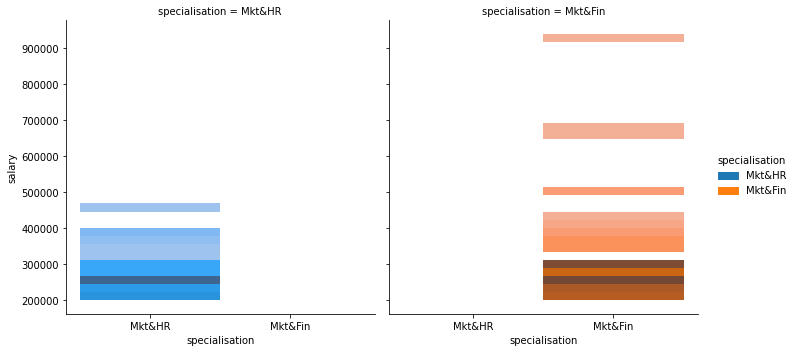

In [67]:
sns.displot(data=df,x='specialisation',y='salary',col='specialisation',hue='specialisation')

39.MBA specialisation does impact the salary offered to students. Students with Mkt&Fin are offered higher salaries compared to Mkt&HR.

<AxesSubplot: xlabel='salary', ylabel='ssc_p'>

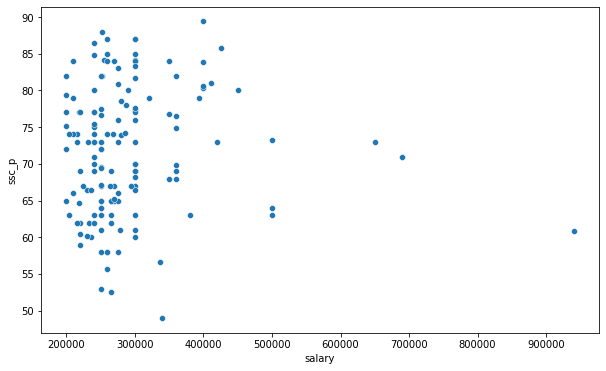

In [68]:
sns.scatterplot(data=df,x='salary',y='ssc_p')

40.SSC% does not affect salary offered to students.

<AxesSubplot: xlabel='salary', ylabel='hsc_p'>

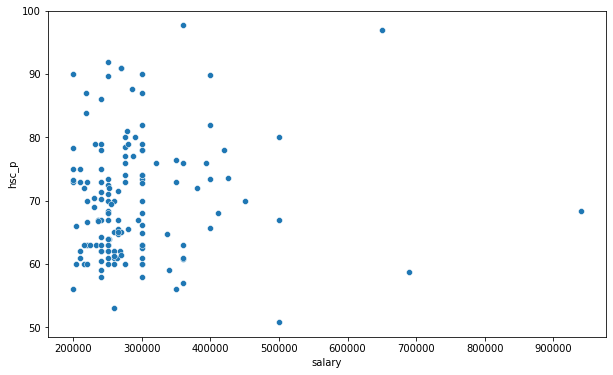

In [69]:
sns.scatterplot(data=df,x='salary',y='hsc_p')

41.HSC% does not affect salary offered to students.

<AxesSubplot: xlabel='salary', ylabel='degree_p'>

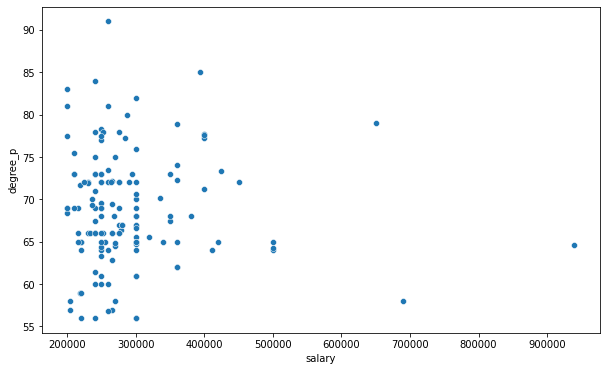

In [70]:
sns.scatterplot(data=df,x='salary',y='degree_p')

42.Degree% does not affect salary offered to students

<AxesSubplot: xlabel='salary', ylabel='etest_p'>

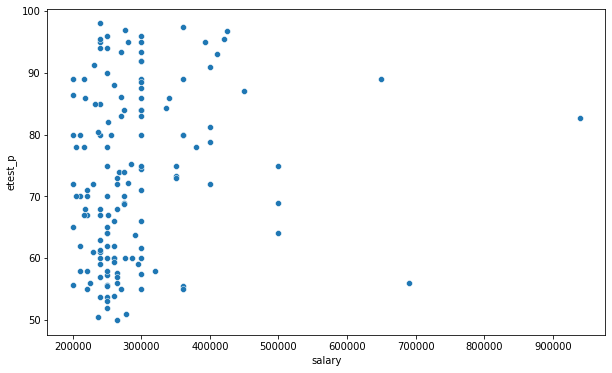

In [71]:
sns.scatterplot(data=df,x='salary',y='etest_p')

43.etest% does not affect salary offered to students

<AxesSubplot: xlabel='salary', ylabel='mba_p'>

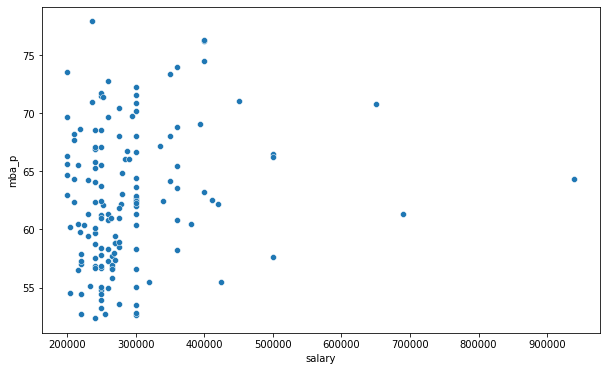

In [72]:
sns.scatterplot(data=df,x='salary',y='mba_p')

44.MBA% does not affect salary offered to students

From this we can infer that companies use MBA% and other % only as a cut-off criteria but not a selection criteria for a student.

## Multivariate Analysis
1. How does the SSC board and SSC % scored by the student affect their placements?
2. How does the HSC board and HSC % scored by the student affect their placements?
3. How does the HSC specialisation and HSC % scored by the student affect their placements?
4. How does the Degree specialisation and Degree % scored by the student affect their placements?
5. How does the MBA specialisation and MBA % scored by the student affect their placements?
6. How does the MBA specialisation and etest % scored by the student affect their placements?
7. Does work experience have an impact on employability scores and help in placements?

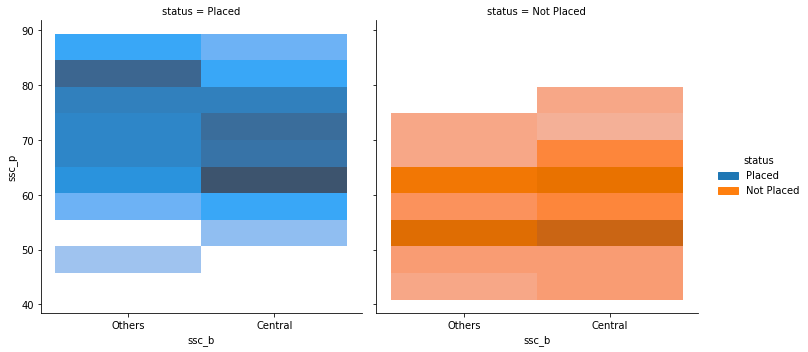

In [73]:
sns.displot(data=df,x='ssc_b',y='ssc_p',col='status',hue='status')

1.Placed students in central board have scores above 50% and above 45% for other boards in ssc, most are placed with >60% scores in central board and >80% in Others board.

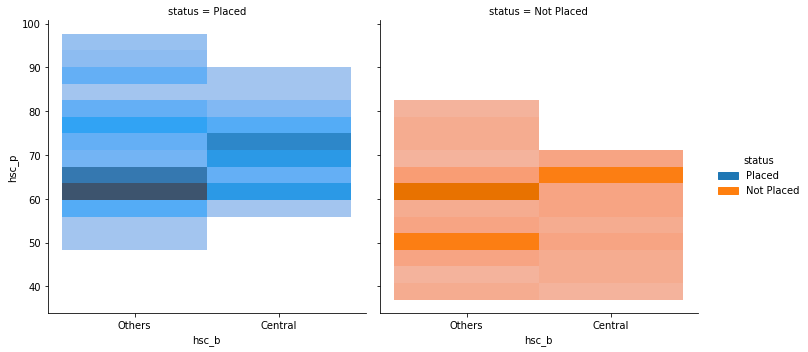

In [74]:
sns.displot(data=df,x='hsc_b',y='hsc_p',col='status',hue='status')

2.Placed students in central board have scores above 55% and above 50% for other boards in hsc. Most are placed with >65% scores in central board and >60% in Other board.

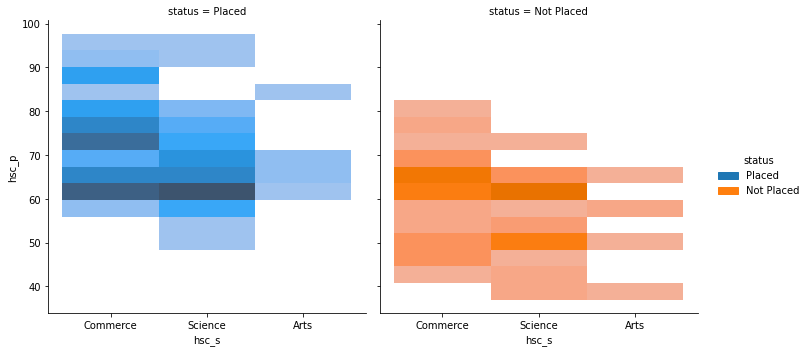

In [75]:
sns.displot(data=df,x='hsc_s',y='hsc_p',col='status',hue='status')

3.Placed students in Commerce have scores above 55%, Science have above 50% and Arts have above 60%. Most are placed with scores greater than 60%.

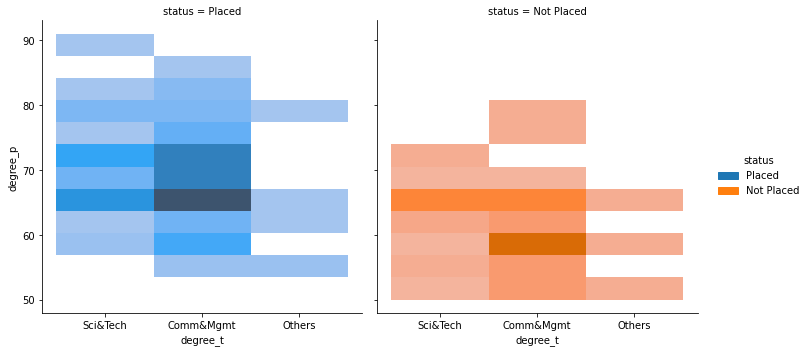

In [76]:
sns.displot(data=df,x='degree_t',y='degree_p',col='status',hue='status')

4.Placed students in Sci&tech have scores above 57%, Comm&Mgmt have above 55% and Others have above 55%. Most students in Sci&Tech and Comm&Mgmt are placed with score >65%.

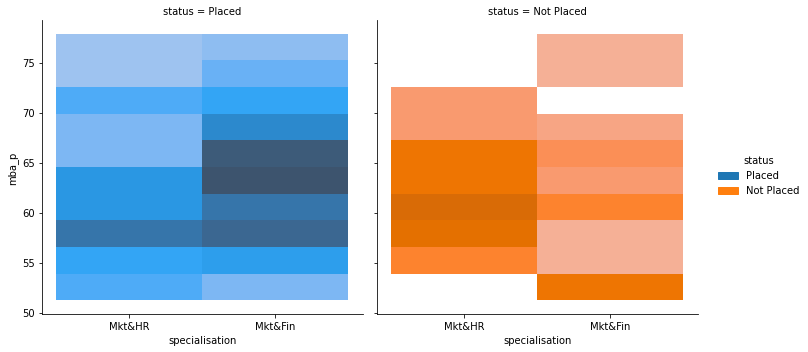

In [77]:
sns.displot(data=df,x='specialisation',y='mba_p',col='status',hue='status')

5.There is no lower limit for placed students in terms of specialisation, however, a major chunk of the students are placed with scores greater than 55%.

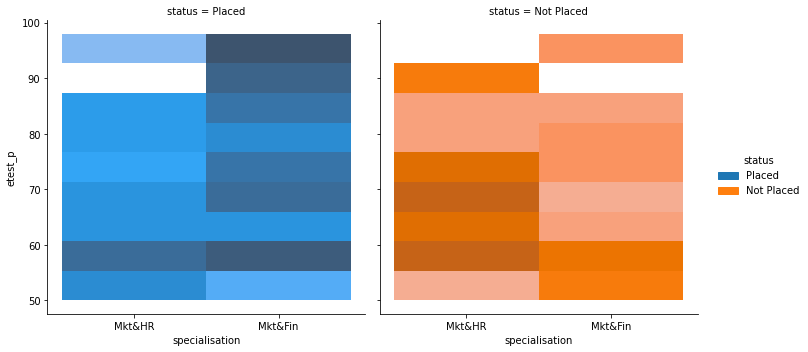

In [78]:
sns.displot(data=df,x='specialisation',y='etest_p',col='status',hue='status')

6.There is no lower limit for placed students in terms of specialisation, however, a major chunk of the students are placed with scores greater than 55% in Mkt&HR and 55% and 65% in Mkt&Fin.

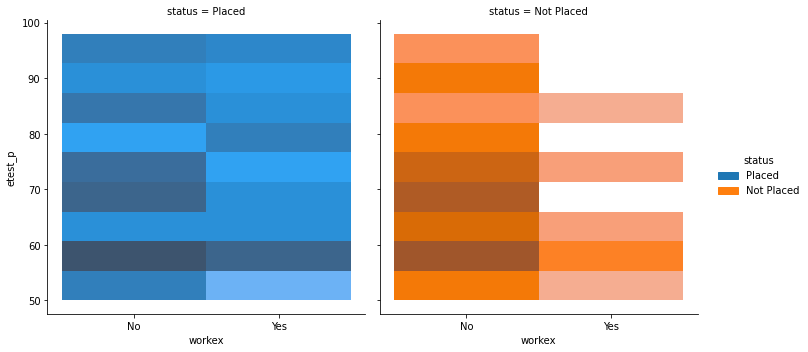

In [79]:
sns.displot(data=df,x='workex',y='etest_p',col='status',hue='status')

7.Work experience does not affect employability scores and the overall placements. 

## Missing Values Check

<AxesSubplot: >

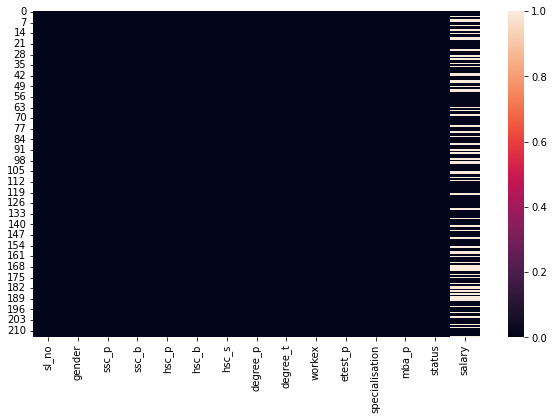

In [80]:
sns.heatmap(df.isnull())

Missing values only in salaries, which belong to unplaced students. We will not be using the salary column to predict placement status, as all placed students have a salary. 

## Detech Outliers

We will use boxplot to identify features with outliers.

<AxesSubplot: xlabel='ssc_p'>

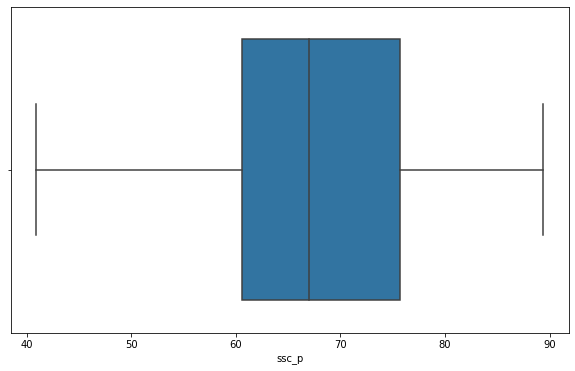

In [81]:
sns.boxplot(data=df,x='ssc_p')

<AxesSubplot: xlabel='hsc_p'>

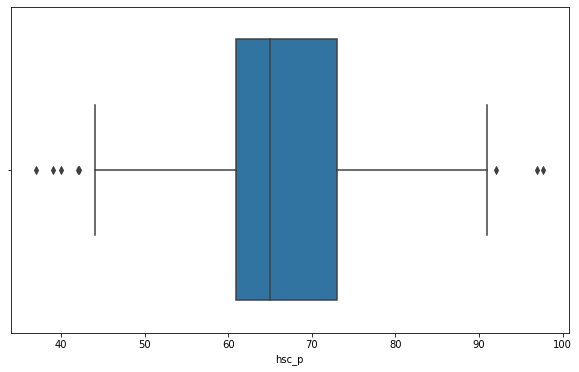

In [82]:
sns.boxplot(data=df,x='hsc_p')

<AxesSubplot: xlabel='degree_p'>

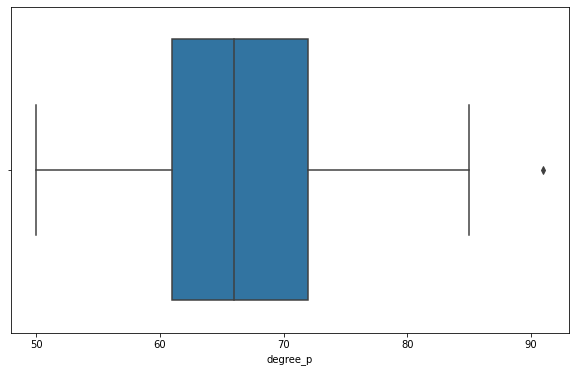

In [83]:
sns.boxplot(data=df,x='degree_p')

<AxesSubplot: xlabel='etest_p'>

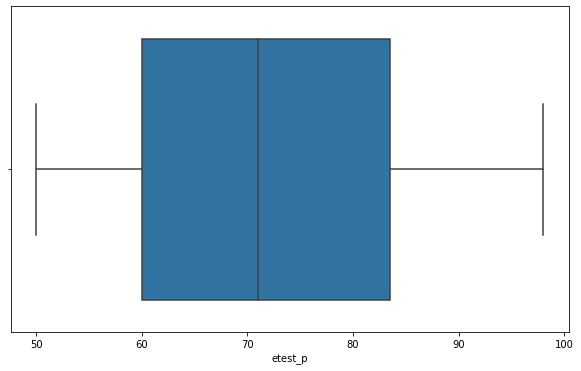

In [84]:
sns.boxplot(data=df,x='etest_p')

<AxesSubplot: xlabel='mba_p'>

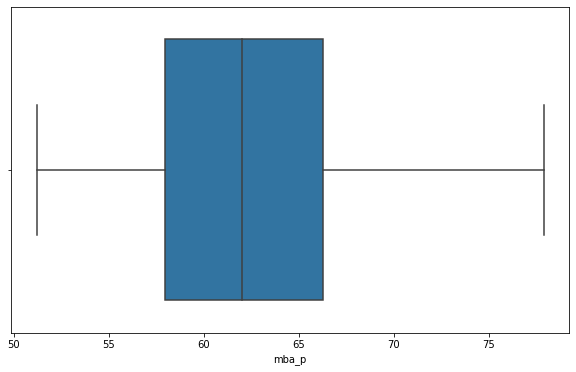

In [85]:
sns.boxplot(data=df,x='mba_p')

Features with Outliers,
1. hsc_p
2. degree_p <br>
We will handle this in Feature Engineering.

# Feature Engineering

## Handling Outliers

In [86]:
def return_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3-Q1
    outliers = []
    Lower_fence = Q1-1.5*(IQR)
    Upper_fence = Q3+1.5*(IQR)
    for i in df:
        if i<Lower_fence or i>Upper_fence:
            outliers.append(i)
    return outliers

In [87]:
hsc_outliers = return_outliers(df['hsc_p'])

In [88]:
degree_outliers = return_outliers(df['degree_p'])

In [89]:
hsc_outliers

[97.7, 39.0, 37.0, 40.0, 92.0, 42.16, 97.0, 42.0]

In [90]:
degree_outliers

[91.0]

In [91]:
df['hsc_p'].median()

65.0

In [92]:
df['degree_p'].median()

66.0

In both hsc_p and degree_p we will replace the outliers with the median values. 

In [93]:
def replace_outliers(i):
    if i<=42.16 or i>=92:
        return 65
    else:
        return i

In [94]:
df['hsc_p'] = df['hsc_p'].apply(replace_outliers)

<AxesSubplot: xlabel='hsc_p'>

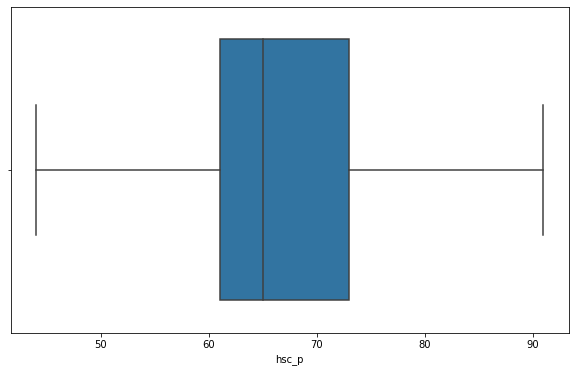

In [95]:
sns.boxplot(data=df,x='hsc_p')

In [96]:
def replace_outliers_2(i):
    if i==91:
        return 66
    else:
        return i

In [97]:
df['degree_p'] = df['degree_p'].apply(replace_outliers_2)

<AxesSubplot: xlabel='degree_p'>

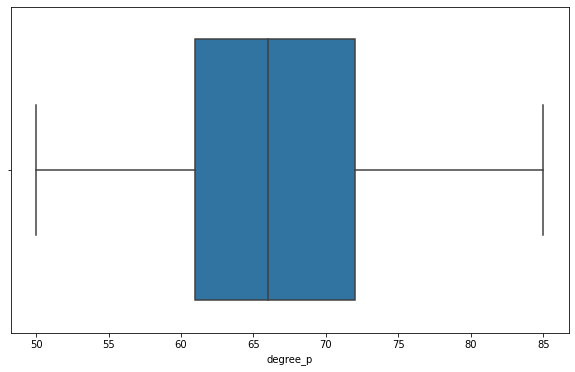

In [98]:
sns.boxplot(data=df,x='degree_p')

## Encoding

We will be using,
1. One hot encoding for - ssc_b, hsc_b, hsc_s, degree_t, workex, gender, specialisation
2. Label Encoder for Status

In [99]:
df = pd.get_dummies(data=df,columns=['gender','ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex','specialisation'],drop_first=True)

In [100]:
from sklearn.preprocessing import LabelEncoder

In [101]:
encoder = LabelEncoder()

In [102]:
df['status'] = encoder.fit_transform(df['status'])

In [103]:
df.head()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,status,salary,gender_M,ssc_b_Others,hsc_b_Others,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech,workex_Yes,specialisation_Mkt&HR
0,1,67.00,91.00,58.00,55.0,58.80,1,270000.0,1,1,1,1,0,0,1,0,1
1,2,79.33,78.33,77.48,86.5,66.28,1,200000.0,1,0,1,0,1,0,1,1,0
2,3,65.00,68.00,64.00,75.0,57.80,1,250000.0,1,0,0,0,0,0,0,0,0
3,4,56.00,52.00,52.00,66.0,59.43,0,NaN,1,0,0,0,1,0,1,0,1
4,5,85.80,73.60,73.30,96.8,55.50,1,425000.0,1,0,0,1,0,0,0,0,0


In [104]:
df['status'].value_counts()

1    148
0     67
Name: status, dtype: int64

We will address the imbalanced dataset while modelling.

# Modelling

 We will be creating 2 models,
1. Classification Model - to predict placement status given other criteria
2. Regression Model - to predict salary of students given other criteria

## Classification Model

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
from sklearn.preprocessing import StandardScaler

In [107]:
scaler = StandardScaler()

In [108]:
X1 = df.drop(columns=['sl_no','salary','status'])

In [109]:
y1 = df['status']

In [110]:
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size=0.25)

### Feature Scaling

In [111]:
X1_train = scaler.fit_transform(X1_train)

In [112]:
X1_test = scaler.transform(X1_test)

In [113]:
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com



[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


### Handling Imbalanced dataset
We will apply SMOTE on training data to handle the imbalanced dataset to create synthetic data points.

In [114]:
import imblearn
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTE

In [115]:
sm = SMOTE(random_state=42)

In [116]:
X1_train,y1_train = sm.fit_resample(X1_train,y1_train)

In [117]:
y1_train.value_counts()

1    109
0    109
Name: status, dtype: int64

### Classifiers

In [118]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
result_1 = pd.DataFrame(columns=['Model','Accuracy Score'])

### K Nearest Neighbours Classifier

In [119]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
weights = ['uniform','distance']
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
metric = ['minkowski','euclidean','manhattan']
algorithm=['auto']
p=[1,2]
knn_hyperparameters = dict(n_neighbors=n_neighbors, weights=weights, algorithm=algorithm, leaf_size=leaf_size, p=p, metric=metric)
KNN_gridSearch = RandomizedSearchCV(knn,param_distributions=knn_hyperparameters,cv=3,verbose=1)
KNN_gridSearch.fit(X1_train,y1_train)
knn_y_pred = KNN_gridSearch.predict(X1_test)
print('KNN Classifier')
print('\n Confusion Matrix')
print(confusion_matrix(y1_test,knn_y_pred))
print('\n Classification Report')
print(classification_report(y1_test,knn_y_pred))
knn_AS = accuracy_score(y1_test,knn_y_pred)
result_1.loc[0] = ['KNN Classifier',knn_AS]

Fitting 3 folds for each of 10 candidates, totalling 30 fits
KNN Classifier

 Confusion Matrix
[[11  4]
 [ 9 30]]

 Classification Report
              precision    recall  f1-score   support

           0       0.55      0.73      0.63        15
           1       0.88      0.77      0.82        39

    accuracy                           0.76        54
   macro avg       0.72      0.75      0.73        54
weighted avg       0.79      0.76      0.77        54



### Random Forest Classifier

In [120]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
max_depth = list(range(10,100,10))
criterion = ['gini', 'entropy']
max_features = ['auto', 'sqrt']
max_depth = list(range(10,100,10))
min_samples_leaf = [1, 2, 4]
min_samples_split = [2, 5, 10]
n_estimators = list(range(200,2000,200))
bootstrap = [True, False]
rfc_hyperparameters = dict(max_depth = max_depth, criterion = criterion, max_features = max_features, min_samples_leaf = min_samples_leaf, n_estimators = n_estimators, bootstrap = bootstrap)
rfc_gridSearch = RandomizedSearchCV(rfc,param_distributions=rfc_hyperparameters,cv=3,verbose=1)
rfc_gridSearch.fit(X1_train,y1_train)
rfc_y_pred = rfc_gridSearch.predict(X1_test)
print('Random Forest Classifier')
print('\n Confusion Matrix')
print(confusion_matrix(y1_test,rfc_y_pred))
print('\n Classification Report')
print(classification_report(y1_test,rfc_y_pred))
rfc_AS = accuracy_score(y1_test,rfc_y_pred)
result_1.loc[1] = ['Random Forest Classifier',rfc_AS]

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Random Forest Classifier

 Confusion Matrix
[[ 7  8]
 [ 3 36]]

 Classification Report
              precision    recall  f1-score   support

           0       0.70      0.47      0.56        15
           1       0.82      0.92      0.87        39

    accuracy                           0.80        54
   macro avg       0.76      0.69      0.71        54
weighted avg       0.79      0.80      0.78        54



### Decision Tree Classifier

In [122]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
criterion=['gini','entropy']
splitter=['best', 'random']
max_depth = list(range(10,100,10))
min_samples_split = [2, 5, 10]
max_features = ['auto', 'sqrt','log2',None]
max_depth = list(range(10,100,10))
min_samples_leaf = [1, 2, 4]
dtc_hyperparameters = dict(criterion=criterion, splitter=splitter, max_depth=max_depth, min_samples_split=min_samples_split, max_features=max_features, min_samples_leaf=min_samples_leaf)
dtc_gridSearch = RandomizedSearchCV(dtc,param_distributions=dtc_hyperparameters,cv=3,verbose=1)
dtc_gridSearch.fit(X1_train,y1_train)
dtc_y_pred = dtc_gridSearch.predict(X1_test)
print('Decision Tree Classifier')
print('\n Confusion Matrix')
print(confusion_matrix(y1_test,dtc_y_pred))
print('\n Classification Report')
print(classification_report(y1_test,dtc_y_pred))
dtc_AS = accuracy_score(y1_test,dtc_y_pred)
result_1.loc[3] = ['Decision Tree Classifier',dtc_AS]

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Decision Tree Classifier

 Confusion Matrix
[[ 9  6]
 [ 8 31]]

 Classification Report
              precision    recall  f1-score   support

           0       0.53      0.60      0.56        15
           1       0.84      0.79      0.82        39

    accuracy                           0.74        54
   macro avg       0.68      0.70      0.69        54
weighted avg       0.75      0.74      0.75        54



### Support Vector Machine (SVM)

In [123]:
from sklearn.svm import SVC
svc = SVC()
C = [0.1, 1, 10, 100, 1000]
kernel = ['rbf','poly','sigmoid','linear']
degree = list(range(1,5,1))
gamma = [1, 0.1, 0.01, 0.001, 0.0001]
svc_hyperparameters = dict(C=C, kernel=kernel, degree=degree, gamma=gamma)
svc_gridSearch = RandomizedSearchCV(svc,param_distributions=svc_hyperparameters,cv=3,verbose=1)
svc_gridSearch.fit(X1_train,y1_train)
svc_y_pred = svc_gridSearch.predict(X1_test)
print('Support Vector Machine (SVC)')
print('\n Confusion Matrix')
print(confusion_matrix(y1_test,svc_y_pred))
print('\n Classification Report')
print(classification_report(y1_test,svc_y_pred))
svc_AS = accuracy_score(y1_test,svc_y_pred)
result_1.loc[4] = ['Support Vector Machine (SVM)',svc_AS]

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Support Vector Machine (SVC)

 Confusion Matrix
[[ 7  8]
 [ 7 32]]

 Classification Report
              precision    recall  f1-score   support

           0       0.50      0.47      0.48        15
           1       0.80      0.82      0.81        39

    accuracy                           0.72        54
   macro avg       0.65      0.64      0.65        54
weighted avg       0.72      0.72      0.72        54



### Gradient Boost Classifier

In [124]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com



[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


### XGBoost Classifier

In [125]:
import xgboost
from xgboost import XGBClassifier
XGBC = XGBClassifier()
max_depth = [3,6,9,12,15]
learning_rate = [int(x) for x in np.linspace(0.01,0.9,25)]
n_estimators = list(range(100,1000,100))
reg_alpha = [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,204.8]
reg_lambda = [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,204.8]
gamma = [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,204.8]
booster =  ['gbtree', 'gblinear']
XGBC_hyperparameters = dict(learning_rate=learning_rate, n_estimators=n_estimators, max_depth=max_depth, reg_alpha=reg_alpha, reg_lambda=reg_lambda, gamma=gamma, booster=booster)
XGBC_gridSearch = RandomizedSearchCV(XGBC,param_distributions=XGBC_hyperparameters,cv=3,verbose=1)
XGBC_gridSearch.fit(X1_train,y1_train)
XGBC_y_pred = XGBC_gridSearch.predict(X1_test)
print('Extreme Gradient Boosting Classifier (XGBC)')
print('\n Confusion Matrix')
print(confusion_matrix(y1_test,XGBC_y_pred))
print('\n Classification Report')
print(classification_report(y1_test,XGBC_y_pred))
XGBC_AS = accuracy_score(y1_test,XGBC_y_pred)
result_1.loc[6] = ['XGBoost Classifier',XGBC_AS]

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[12:00:03] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[12:00:03] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[12:00:03] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[12:00:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[12:00:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1

### AdaBoost Classifier

In [126]:
from sklearn.ensemble import AdaBoostClassifier
Ada = AdaBoostClassifier()
n_estimators = list(range(100,2000,100))
learning_rate = [float(x) for x in np.linspace(0.01,0.9,25)]
Ada_hyperparameters = dict(n_estimators=n_estimators, learning_rate=learning_rate)
Ada_gridSearch = RandomizedSearchCV(Ada,param_distributions=Ada_hyperparameters,cv=3,verbose=1)
Ada_gridSearch.fit(X1_train,y1_train)
Ada_y_pred = Ada_gridSearch.predict(X1_test)
print('AdaBoost Classifier')
print('\n Confusion Matrix')
print(confusion_matrix(y1_test,Ada_y_pred))
print('\n Classification Report')
print(classification_report(y1_test,Ada_y_pred))
Ada_AS = accuracy_score(y1_test,Ada_y_pred)
result_1.loc[7] = ['AdaBoost Classifier',Ada_AS]

Fitting 3 folds for each of 10 candidates, totalling 30 fits
AdaBoost Classifier

 Confusion Matrix
[[ 9  6]
 [ 2 37]]

 Classification Report
              precision    recall  f1-score   support

           0       0.82      0.60      0.69        15
           1       0.86      0.95      0.90        39

    accuracy                           0.85        54
   macro avg       0.84      0.77      0.80        54
weighted avg       0.85      0.85      0.84        54



### CatBoost Classifier

In [127]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com



[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [128]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier()
depth = [4,5,6,7,8,9,10]
learning_rate =  [float(x) for x in np.linspace(0.01,0.9,25)]
iterations = list(range(10,200,10))
cat_hyperparameters = dict(depth=depth, learning_rate=learning_rate, iterations=iterations)
cat_gridSearch = RandomizedSearchCV(cat,param_distributions=cat_hyperparameters,cv=3,verbose=1)
cat_gridSearch.fit(X1_train,y1_train)
cat_y_pred = cat_gridSearch.predict(X1_test)
print('CatBoost Classifier')
print('\n Confusion Matrix')
print(confusion_matrix(y1_test,cat_y_pred))
print('\n Classification Report')
print(classification_report(y1_test,cat_y_pred))
cat_AS = accuracy_score(y1_test,cat_y_pred)
result_1.loc[8] = ['CatBoost Classifier',cat_AS]

Fitting 3 folds for each of 10 candidates, totalling 30 fits
0:	learn: 0.5866744	total: 150ms	remaining: 1.35s
1:	learn: 0.5054899	total: 151ms	remaining: 603ms
2:	learn: 0.4652224	total: 151ms	remaining: 353ms
3:	learn: 0.4257520	total: 152ms	remaining: 228ms
4:	learn: 0.3916484	total: 153ms	remaining: 153ms
5:	learn: 0.3588813	total: 153ms	remaining: 102ms
6:	learn: 0.3325663	total: 154ms	remaining: 66ms
7:	learn: 0.3064229	total: 155ms	remaining: 38.6ms
8:	learn: 0.2934979	total: 155ms	remaining: 17.2ms
9:	learn: 0.2749286	total: 156ms	remaining: 0us
0:	learn: 0.5987837	total: 589us	remaining: 5.3ms
1:	learn: 0.5376141	total: 1.49ms	remaining: 5.96ms
2:	learn: 0.4960097	total: 2.37ms	remaining: 5.52ms
3:	learn: 0.4469879	total: 3.1ms	remaining: 4.65ms
4:	learn: 0.4170700	total: 3.73ms	remaining: 3.73ms
5:	learn: 0.3811715	total: 4.6ms	remaining: 3.07ms
6:	learn: 0.3578101	total: 5.41ms	remaining: 2.32ms
7:	learn: 0.3366174	total: 6.06ms	remaining: 1.52ms
8:	learn: 0.3157831	total: 6

In [129]:
result_1

,Model,Accuracy Score
0,KNN Classifier,0.759259
1,Random Forest Classifier,0.796296
3,Decision Tree Classifier,0.740741
4,Support Vector Machine (SVM),0.722222
6,XGBoost Classifier,0.277778
7,AdaBoost Classifier,0.851852
8,CatBoost Classifier,0.759259


## Regressors

Since we have null values in salary, we will fill it with zeros or the lowest salary in the batch (assumption: upcoming companies will offer salaries equal to or less than the lowest currently offered), or 25th/50th/75th percentile values as they are unplaced students. We will try all 5 approaches to determine which gives us the best results.

In [130]:
df['salary'].describe()

count       148.000000
mean     288655.405405
std       93457.452420
min      200000.000000
25%      240000.000000
50%      265000.000000
75%      300000.000000
max      940000.000000
Name: salary, dtype: float64

In [131]:
df.isnull().sum()

sl_no                     0
ssc_p                     0
hsc_p                     0
degree_p                  0
etest_p                   0
mba_p                     0
status                    0
salary                   67
gender_M                  0
ssc_b_Others              0
hsc_b_Others              0
hsc_s_Commerce            0
hsc_s_Science             0
degree_t_Others           0
degree_t_Sci&Tech         0
workex_Yes                0
specialisation_Mkt&HR     0
dtype: int64

In [132]:
df['salary'].fillna(0,inplace=True) 

In [137]:
X = df.drop(columns=['sl_no','status','salary'])

In [138]:
y = df['salary']

In [139]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

### Feature Scaling

In [140]:
scaler_2 = StandardScaler()

In [141]:
X_train = scaler_2.fit_transform(X_train)

In [142]:
X_test = scaler_2.transform(X_test)

### Regressor Models

In [143]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from math import sqrt
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings("ignore")
result = pd.DataFrame(columns=['Model','Mean Absolute Error','Mean Squared Error','Root Mean Squared Error','R2 Score'])

### Linear Regression

In [144]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_y_pred = lr.predict(X_test)
print('Linear Regression')
print('\n Mean Absolute Error = ')
mae = mean_absolute_error(y_test,lr_y_pred)
print(mae)
print('\n Mean Squared Error')
mse = mean_squared_error(y_test,lr_y_pred)
print(mse)
print('\n Root Mean Squared Error')
rmse = sqrt(mse)
print(rmse)
print('\n R Square = ')
r2 = r2_score(y_test,lr_y_pred)
print(r2)
result.loc[0] = ['Linear Regression',mae,mse,rmse,r2]

Linear Regression

 Mean Absolute Error = 
95194.43446762739

 Mean Squared Error
16393314071.171108

 Root Mean Squared Error
128036.3779211639

 R Square = 
0.4226153223036657


### Decision Tree

In [145]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
criterion = ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
splitter = ['best','random']
max_depth = [None,1,3,5,7,9,11,13,15]
min_samples_leaf = list(range(1,20,1))
max_features = ['auto','log2','sqrt',None]
max_leaf_nodes = [None,10,20,30,40,50,60,70,80,90,100]
min_samples_split = list(range(1,40))
dtr_hyperparameters = dict(criterion=criterion,splitter=splitter,max_depth=max_depth,min_samples_leaf=min_samples_leaf,max_features=max_features,max_leaf_nodes=max_leaf_nodes,min_samples_split=min_samples_split)
dtr_gridSearch = RandomizedSearchCV(dtr,param_distributions=dtr_hyperparameters,cv=3,verbose=1)
dtr_gridSearch.fit(X_train,y_train)
dtr_y_pred = dtr_gridSearch.predict(X_test)
print('Decision Tree Regressor')
print('\n Mean Absolute Error = ')
mae = mean_absolute_error(y_test,dtr_y_pred)
print(mae)
print('\n Mean Squared Error')
mse = mean_squared_error(y_test,dtr_y_pred)
print(mse)
print('\n Root Mean Squared Error')
rmse = sqrt(mse)
print(rmse)
print('\n R Square = ')
r2 = r2_score(y_test,dtr_y_pred)
print(r2)
result.loc[1] = ['Decision Tree',mae,mse,rmse,r2]

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Decision Tree Regressor

 Mean Absolute Error = 
114432.6754456572

 Mean Squared Error
20442923356.60241

 Root Mean Squared Error
142978.75141643392

 R Square = 
0.2799850803700529


### Support Vector Machines - SVR

In [146]:
from sklearn.svm import SVR
svr = SVR()
C = [0.1,1,10,100,1000,10000] 
degree = [0, 1, 2, 3, 4, 5, 6]
gamma = [1.0,0.5,0.1,0.01,0.001,0.0001,1e-5,1e-6]
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
svr_hyperparameters = dict(C=C,degree=degree,gamma=gamma,kernel=kernel)
svr_gridSearch = RandomizedSearchCV(svr,param_distributions=svr_hyperparameters,cv=3,verbose=1)
svr_gridSearch.fit(X_train,y_train)
svr_y_pred = svr_gridSearch.predict(X_test)
print('Decision Tree Regressor')
print('\n Mean Absolute Error = ')
mae = mean_absolute_error(y_test,svr_y_pred)
print(mae)
print('\n Mean Squared Error')
mse = mean_squared_error(y_test,svr_y_pred)
print(mse)
print('\n Root Mean Squared Error')
rmse = sqrt(mse)
print(rmse)
print('\n R Square = ')
r2 = r2_score(y_test,svr_y_pred)
print(r2)
result.loc[2] = ['Support Vector Machines - SVR',mae,mse,rmse,r2]

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Decision Tree Regressor

 Mean Absolute Error = 
105468.28032104242

 Mean Squared Error
20029881863.493076

 Root Mean Squared Error
141526.96514619776

 R Square = 
0.2945327080394048


### Random Forest Regressor

In [147]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
bootstrap = [True,False]
criterion = ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
max_depth = [None,1,3,5,7,9,11,13,15]
min_samples_leaf = list(range(1,20,1))
max_features = ['auto','log2','sqrt',None]
max_leaf_nodes = [None,10,20,30,40,50,60,70,80,90,100]
min_samples_split = list(range(1,40))
n_estimators = list(range(100,2000,100))
warm_start = [True,False]
rfr_hyperparameters = dict(bootstrap=bootstrap,criterion=criterion,max_depth=max_depth,min_samples_leaf=min_samples_leaf,max_features=max_features,max_leaf_nodes=max_leaf_nodes,min_samples_split=min_samples_split,n_estimators=n_estimators,warm_start=warm_start)
rfr_gridSearch = RandomizedSearchCV(rfr,param_distributions=rfr_hyperparameters,cv=3,verbose=1)
rfr_gridSearch.fit(X_train,y_train)
rfr_y_pred = rfr_gridSearch.predict(X_test)
print('Random Forest Regressor')
print('\n Mean Absolute Error = ')
mae = mean_absolute_error(y_test,rfr_y_pred)
print(mae)
print('\n Mean Squared Error')
mse = mean_squared_error(y_test,rfr_y_pred)
print(mse)
print('\n Root Mean Squared Error')
rmse = sqrt(mse)
print(rmse)
print('\n R Square = ')
r2 = r2_score(y_test,rfr_y_pred)
print(r2)
result.loc[3] = ['Random Forest Regressor',mae,mse,rmse,r2]

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Random Forest Regressor

 Mean Absolute Error = 
100942.38121838517

 Mean Squared Error
22708130687.850048

 Root Mean Squared Error
150692.1719527927

 R Square = 
0.2002027984477034


### Ridge Regression

In [148]:
from sklearn.linear_model import Ridge
ridge = Ridge()
alpha = [float(x) for x in np.linspace(0.01,0.9,25)] 
ridge_hyperparameters = dict(alpha=alpha)
ridge_gridSearch = RandomizedSearchCV(ridge,param_distributions=ridge_hyperparameters,cv=3,verbose=1)
ridge_gridSearch.fit(X_train,y_train)
ridge_y_pred = ridge_gridSearch.predict(X_test)
print('Ridge Regression')
print('\n Mean Absolute Error = ')
mae = mean_absolute_error(y_test,ridge_y_pred)
print(mae)
print('\n Mean Squared Error')
mse = mean_squared_error(y_test,ridge_y_pred)
print(mse)
print('\n Root Mean Squared Error')
rmse = sqrt(mse)
print(rmse)
print('\n R Square = ')
r2 = r2_score(y_test,ridge_y_pred)
print(r2)
result.loc[4] = ['Ridge Regression',mae,mse,rmse,r2]

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Ridge Regression

 Mean Absolute Error = 
95198.97826829886

 Mean Squared Error
16376026516.733398

 Root Mean Squared Error
127968.84979061662

 R Square = 
0.42322420279017625


### Lasso Regression

In [149]:
from sklearn.linear_model import Lasso
lasso = Lasso()
alpha = [float(x) for x in np.linspace(0.01,0.9,25)]
lasso_hyperparameters = dict(alpha=alpha)
lasso_gridSearch = RandomizedSearchCV(lasso,param_distributions=lasso_hyperparameters,cv=3,verbose=1)
lasso_gridSearch.fit(X_train,y_train)
lasso_y_pred = lasso_gridSearch.predict(X_test)
print('Lasso Regression')
print('\n Mean Absolute Error = ')
mae = mean_absolute_error(y_test,lasso_y_pred)
print(mae)
print('\n Mean Squared Error')
mse = mean_squared_error(y_test,lasso_y_pred)
print(mse)
print('\n Root Mean Squared Error')
rmse = sqrt(mse)
print(rmse)
print('\n R Square = ')
r2 = r2_score(y_test,lasso_y_pred)
print(r2)
result.loc[5] = ['Lasso Regression',mae,mse,rmse,r2]

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Lasso Regression

 Mean Absolute Error = 
95195.18423566228

 Mean Squared Error
16393259795.474138

 Root Mean Squared Error
128036.16596678509

 R Square = 
0.4226172339339599


### Gradient Boost Regressor

In [150]:
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor()
alpha = np.linspace(0,0.9,9)
criterion = ['friedman_mse', 'squared_error', 'mse', 'mae']
loss = ['squared_error', 'absolute_error', 'huber', 'quantile']
max_features = ['auto', 'sqrt', 'log2']
max_leaf_nodes = [None,1,3,5,7,9,11,13,15]
learning_rate=[1, 0.5, 0.25, 0.1, 0.05, 0.01]
n_estimators=[1, 2, 4, 8, 16, 32, 64, 128, 256,512]
min_samples_split=list(range(1,10,1))
min_samples_leaf=list(range(1,10,1))
max_depth=list(range(1,32,1))
GBR_hyperparameters = dict(alpha=alpha, criterion=criterion, loss=loss, max_features=max_features, max_leaf_nodes=max_leaf_nodes, learning_rate=learning_rate, n_estimators=n_estimators, min_samples_leaf=min_samples_leaf, min_samples_split=min_samples_split, max_depth=max_depth)
GBR_gridSearch = RandomizedSearchCV(GBR,param_distributions=GBR_hyperparameters,cv=3,verbose=1)
GBR_gridSearch.fit(X_train,y_train)
GBR_y_pred = GBR_gridSearch.predict(X_test)
print('Gradient Boost Regressor')
print('\n Mean Absolute Error = ')
mae = mean_absolute_error(y_test,GBR_y_pred)
print(mae)
print('\n Mean Squared Error')
mse = mean_squared_error(y_test,GBR_y_pred)
print(mse)
print('\n Root Mean Squared Error')
rmse = sqrt(mse)
print(rmse)
print('\n R Square = ')
r2 = r2_score(y_test,GBR_y_pred)
print(r2)
result.loc[6] = ['Gradient Boost Regressor',mae,mse,rmse,r2]

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Gradient Boost Regressor

 Mean Absolute Error = 
115509.39273312414

 Mean Squared Error
23505523559.142895

 Root Mean Squared Error
153315.11197250875

 R Square = 
0.17211803023122496


### XGBoost Regressor

In [151]:
from xgboost import XGBRegressor
XGBR = XGBRegressor()
max_depth = [3,6,9,12,15]
learning_rate = [float(x) for x in np.linspace(0.01,0.9,25)]
n_estimators = list(range(100,1000,100))
reg_alpha = [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,204.8]
reg_lambda = [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,204.8]
gamma = [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,204.8]
booster =  ['gbtree', 'gblinear']
XGBR_hyperparameters = dict(learning_rate=learning_rate, n_estimators=n_estimators, max_depth=max_depth, reg_alpha=reg_alpha, reg_lambda=reg_lambda, gamma=gamma, booster=booster)
XGBR_gridSearch = RandomizedSearchCV(XGBR,param_distributions=XGBR_hyperparameters,cv=3,verbose=1)
XGBR_gridSearch.fit(X_train,y_train)
XGBR_y_pred = XGBR_gridSearch.predict(X_test)
print('Extreme Gradient Boosting Regressor (XGBR)')
print('\n Mean Absolute Error = ')
mae = mean_absolute_error(y_test,XGBR_y_pred)
print(mae)
print('\n Mean Squared Error')
mse = mean_squared_error(y_test,XGBR_y_pred)
print(mse)
print('\n Root Mean Squared Error')
rmse = sqrt(mse)
print(rmse)
print('\n R Square = ')
r2 = r2_score(y_test,XGBR_y_pred)
print(r2)
result.loc[7] = ['XGBoost Regressor',mae,mse,rmse,r2]

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[12:01:27] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[12:01:27] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[12:01:27] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[12:01:27] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[12:01:27] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1

### AdaBoost Regressor

In [152]:
from sklearn.ensemble import AdaBoostRegressor
adaR = AdaBoostRegressor()
n_estimators = list(range(100,2000,100))
learning_rate = [float(x) for x in np.linspace(0.01,0.9,25)]
loss = ['linear', 'square', 'exponential']
AdaR_hyperparameters = dict(learning_rate=learning_rate, n_estimators=n_estimators, loss=loss)
AdaR_gridSearch = RandomizedSearchCV(adaR,param_distributions=AdaR_hyperparameters,cv=3,verbose=1)
AdaR_gridSearch.fit(X_train,y_train)
AdaR_y_pred = AdaR_gridSearch.predict(X_test)
print('AdaBoost Regressor')
print('\n Mean Absolute Error = ')
mae = mean_absolute_error(y_test,AdaR_y_pred)
print(mae)
print('\n Mean Squared Error')
mse = mean_squared_error(y_test,AdaR_y_pred)
print(mse)
print('\n Root Mean Squared Error')
rmse = sqrt(mse)
print(rmse)
print('\n R Square = ')
r2 = r2_score(y_test,AdaR_y_pred)
print(r2)
result.loc[8] = ['AdaBoost Regressor',mae,mse,rmse,r2]

Fitting 3 folds for each of 10 candidates, totalling 30 fits
AdaBoost Regressor

 Mean Absolute Error = 
109310.95721334859

 Mean Squared Error
18669132321.14764

 Root Mean Squared Error
136635.03328629755

 R Square = 
0.3424593159553859


In [153]:
result

,Model,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score
0,Linear Regression,95194.434468,1.639331e+10,128036.377921,0.422615
1,Decision Tree,114432.675446,2.044292e+10,142978.751416,0.279985
2,Support Vector Machines - SVR,105468.280321,2.002988e+10,141526.965146,0.294533
3,Random Forest Regressor,100942.381218,2.270813e+10,150692.171953,0.200203
4,Ridge Regression,95198.978268,1.637603e+10,127968.849791,0.423224
5,Lasso Regression,95195.184236,1.639326e+10,128036.165967,0.422617
6,Gradient Boost Regressor,115509.392733,2.350552e+10,153315.111973,0.172118
7,XGBoost Regressor,112337.242911,2.339462e+10,152953.002536,0.176024
8,AdaBoost Regressor,109310.957213,1.866913e+10,136635.033286,0.342459
